In [7]:
#import library
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
filename= "dataset/danger_alarm_1.wav"

In [9]:
# load audio files with librosa
scale, sr = librosa.load(filename, sr=16000)

In [10]:
ipd.Audio(filename)

In [11]:
scale[:1000]

array([-2.70690918e-02, -3.35083008e-02, -2.42919922e-02, -2.03247070e-02,
       -1.07727051e-02,  1.44653320e-02,  1.83715820e-02,  8.54492188e-03,
        1.89208984e-03, -5.73730469e-03, -1.31835938e-02,  1.89208984e-03,
        2.31933594e-02,  2.03552246e-02,  1.71203613e-02,  1.06506348e-02,
       -3.81469727e-03, -2.16674805e-02, -3.68957520e-02, -4.13208008e-02,
       -3.42712402e-02, -9.36889648e-03,  1.52893066e-02,  2.62145996e-02,
        2.27661133e-02,  1.72729492e-02,  1.40686035e-02,  1.70288086e-02,
        2.05993652e-02,  1.60217285e-02,  1.21459961e-02,  2.68554688e-03,
       -5.79833984e-03, -1.76391602e-02, -2.66113281e-02, -2.88696289e-02,
       -2.47497559e-02, -1.25732422e-02, -4.27246094e-03,  1.19323730e-02,
        2.37731934e-02,  2.53601074e-02,  2.16369629e-02,  1.36718750e-02,
        6.89697266e-03,  5.46264648e-03,  7.32421875e-03, -1.92260742e-03,
       -1.54113770e-02, -1.84326172e-02, -4.69970703e-03, -2.01416016e-03,
       -2.74658203e-03, -

In [12]:
raw_data = [scale]

...

...

...

<h3><b>Mel Spectrogram

In [13]:
sample_rate= 16000
filter_banks = librosa.filters.mel(n_fft=2048, sr=sr, n_mels=40)

In [14]:
filter_banks.shape

(40, 1025)

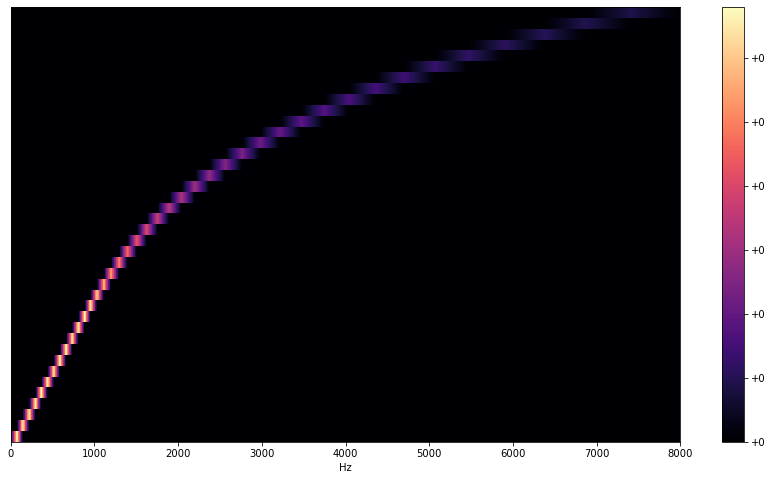

In [15]:
plt.figure(figsize=(15, 8))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()


Text(0.5, 0, 'Frequency(Hz)')

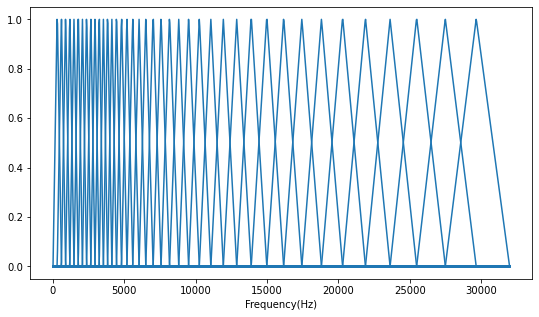

In [16]:
# Filterbanks triangle

n_fft=int(0.032*sample_rate)         #25ms
hop_length= int(0.016*sample_rate)   #10ms
#filter_banks = librosa.filters.mel(sr=f_s, n_fft=n_fft, n_mels=40)
filter_banks /= np.max(filter_banks, axis=-1)[:, None]
f = np.arange(filter_banks.T.shape[0])/512*sample_rate
plt.figure(figsize=(9,5))
plt.plot(f, filter_banks.T, "-", c="tab:blue")
plt.xlabel('Frequency(Hz)')

<h3><b>Extracting Mel Spectrogram

In [17]:
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=40)

In [18]:
mel_spectrogram.shape

(40, 63)

In [19]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [20]:
log_mel_spectrogram.shape

(40, 63)

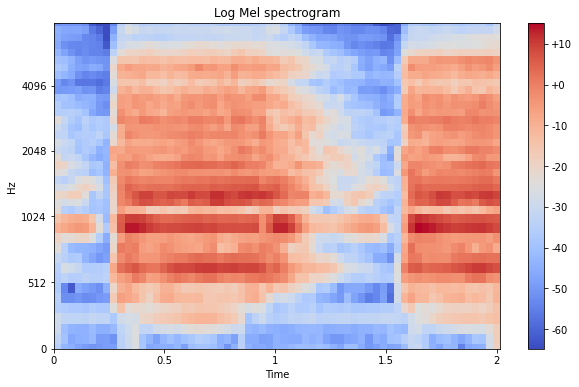

In [21]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.title('Log Mel spectrogram')
plt.colorbar(format="%+2.f")
plt.show()